# Hip-Hop vs Rock
### Classifying Hip-Hop and Rock songs
The study has been done on the basis of dataset from Kaggle

In [183]:
import pandas as pd                         #Importing the required libraries
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('fma-rock-vs-hiphop.csv')

In [184]:
df.shape                                    #Gives the number of rows and columns in our table

(17734, 21)

In [185]:
df.isnull().sum()                           #Returns the number of missing values in the dataset

track_id             0
bit_rate             0
comments             0
composer         17568
date_created         0
date_recorded    15836
duration             0
favorites            0
genre_top            0
genres               0
genres_all           0
information      17251
interest             0
language_code    13645
license             20
listens              0
lyricist         17681
number               0
publisher        17682
tags                 0
title                0
dtype: int64

In [186]:
df.dtypes                                   #Dispalys the datatype of each column in the dataset

track_id          int64
bit_rate          int64
comments          int64
composer         object
date_created     object
date_recorded    object
duration          int64
favorites         int64
genre_top        object
genres           object
genres_all       object
information      object
interest          int64
language_code    object
license          object
listens           int64
lyricist         object
number            int64
publisher        object
tags             object
title            object
dtype: object

In [187]:
df.describe()                               #Gives a descriptive statistics summary of a given dataframe

,track_id,bit_rate,comments,duration,favorites,interest,listens,number
count,17734.000000,17734.000000,17734.000000,17734.000000,17734.000000,1.773400e+04,17734.000000,17734.000000
mean,69394.145991,258971.413781,0.020695,220.942934,1.685237,1.678238e+03,1079.709541,6.184110
std,45784.589753,61535.621463,0.270070,177.906821,6.629402,9.394969e+03,4693.497635,7.075062
min,2.000000,-1.000000,0.000000,2.000000,0.000000,1.800000e+01,9.000000,0.000000
25%,29979.000000,220982.000000,0.000000,139.000000,0.000000,4.210000e+02,214.000000,2.000000
50%,64193.500000,256000.000000,0.000000,192.000000,1.000000,8.240000e+02,461.000000,5.000000
75%,109442.750000,320000.000000,0.000000,255.000000,2.000000,1.628000e+03,1018.000000,8.000000
max,155319.000000,448000.000000,24.000000,3675.000000,554.000000,1.038669e+06,433992.000000,100.000000


#### Bar graph on the diffrent genres of Rock and Hip-Hop songs

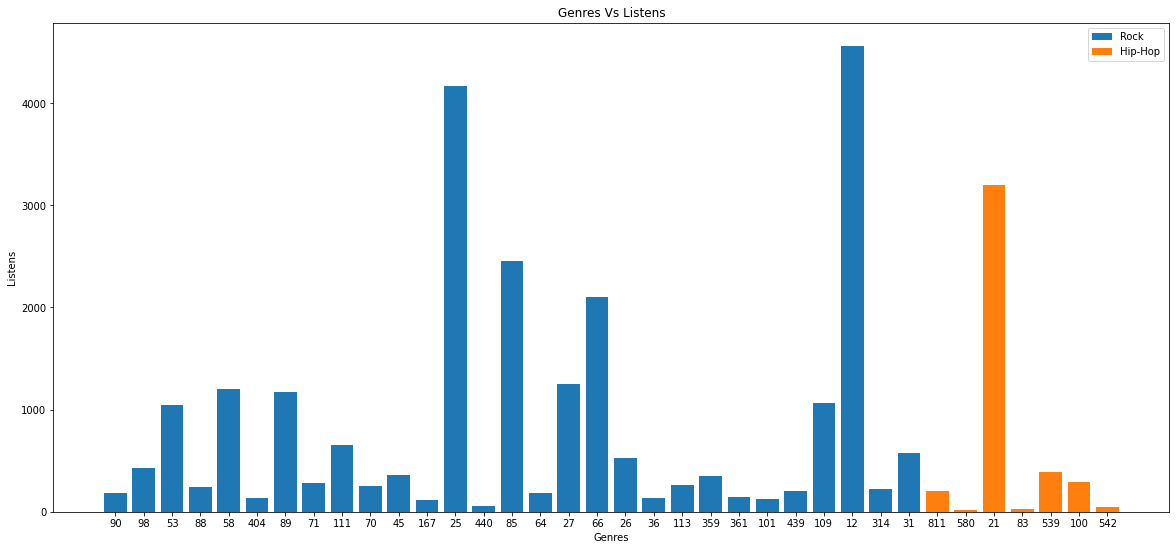

In [188]:
a = df.genres.values
i=0
rock=[]
hipop=[]
while(i<len(a)):
    if df.genre_top[i] == "Rock":           #Extracting the string values from the array to obtain the plot points for our graph
        b = a[i].strip("[]").split(",")
        j=0
        while(j<len(b)):
            rock.append(b[j].strip())
            j+=1
    else: 
        b = a[i].strip("[]").split(",")
        j=0
        while(j<len(b)):
            hipop.append(b[j].strip())
            j+=1
    i+=1
r = list(set(rock))                         
h = list(set(hipop))
j=[]
k=[]
for i in r:
    j.append(rock.count(i))
for i in h:
    k.append(hipop.count(i))
plt.figure(figsize=(20,9))
plt.bar(r,j, label="Rock")
plt.bar(h,k, label="Hip-Hop")
plt.title('Genres Vs Listens')
plt.xlabel('Genres')
plt.ylabel('Listens')
plt.legend()
plt.show()

#### A scatter plot between size, intrest, listens, duration
The given graph suggest that the probablity of the songs getting more attention is inversely proportional to its size and duration.

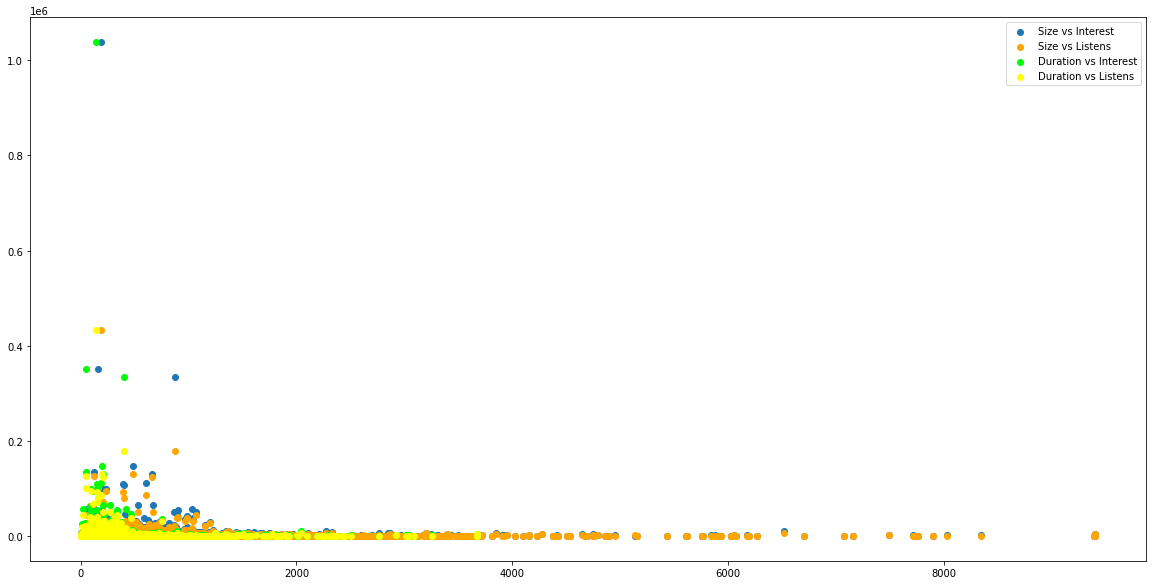

In [189]:
bitrate = df.bit_rate.values
duration = df.duration.values
intrest = df.interest.values
listens = df.listens.values
size = []                       
i=0
while i<len(bitrate):
    size.append(bitrate[i]*duration[i]/100000)
    i+=1
plt.figure(figsize=(20,10))
plt.scatter(size, intrest, label="Size vs Interest")
plt.scatter(size, listens, c="orange", label="Size vs Listens")
plt.scatter(duration, intrest, c="#00FF00", label="Duration vs Interest")
plt.scatter(duration, listens, c="#FFFF00", label="Duration vs Listens")
plt.legend()
plt.show()

#### A scatter plot which displays the 'direct proportionality' between interest and listens for the two genres Rock and Hip-Hop
The regression line plotted using the least square method suggest that Rocks songs are played more than Hip-Hop

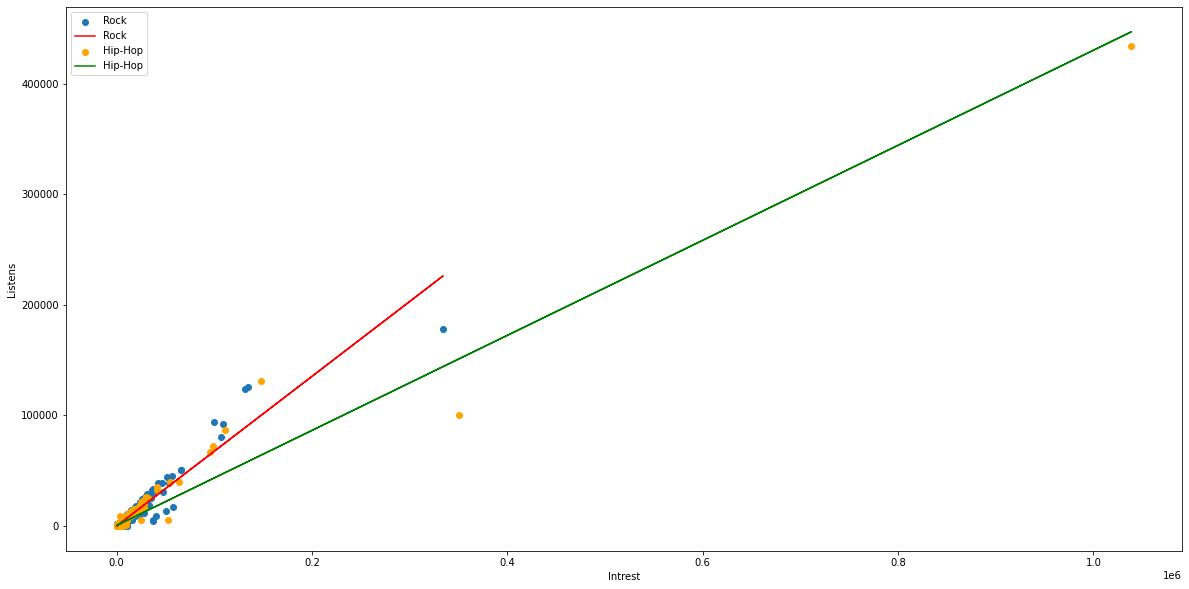

In [190]:
ri=[]
hi=[]
rl=[]
hl=[]
intrest = df.interest.values
listens = df.listens.values
i=0
while(i<len(intrest)):
    if df.genre_top[i] == "Rock":
        ri.append(intrest[i])
        rl.append(listens[i])    
    else:
        hi.append(intrest[i])
        hl.append(listens[i])
    i+=1
plt.figure(figsize=(20,10))
plt.scatter(ri,rl, label="Rock")
z = np.polyfit(ri, rl, 1)
p = np.poly1d(z)
plt.plot(ri,p(ri),"r", label="Rock")
plt.scatter(hi,hl,c="Orange", label="Hip-Hop")
z = np.polyfit(hi, hl, 1)
p = np.poly1d(z)
plt.plot(hi,p(hi),"g", label="Hip-Hop")
plt.xlabel('Intrest')
plt.ylabel('Listens')
plt.legend()
plt.show()


#### Heat map on the correlation matrix of the given dataset 

C:\Users\ANUBHA~1\AppData\Local\Temp/ipykernel_15728/2763650836.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  df = df.dropna('columns') # drop columns with NaN


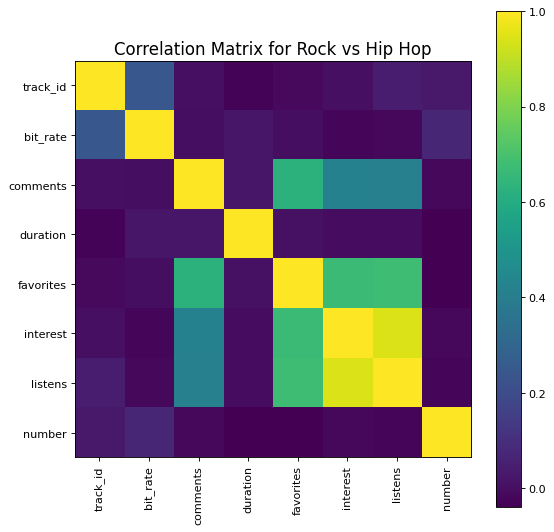

In [191]:
def plotCorrelationMatrix(df, graphWidth):
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] 
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for Rock vs Hip Hop', fontsize=15)
    plt.show()
plotCorrelationMatrix(df, 8)

#### Reading the given Echonest file
The given Echonest data file can be used to train a model to predict the Genre of the song. We first merge the earlier tracks file to the Echonest to classify Rock and Hip-Hop songs.

In [192]:
import pandas as pd
tracks = pd.read_csv("fma-rock-vs-hiphop.csv")
echonest = pd.read_json("echonest-metrics.json", precise_float=True)
echotracks = pd.merge(echonest, tracks[['track_id','genre_top']], on='track_id')
echotracks

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,genre_top
0,2,0.416675,0.675894,0.634476,1.062807e-02,0.177647,0.159310,165.922,0.576661,Hip-Hop
1,3,0.374408,0.528643,0.817461,1.851103e-03,0.105880,0.461818,126.957,0.269240,Hip-Hop
2,5,0.043567,0.745566,0.701470,6.967990e-04,0.373143,0.124595,100.260,0.621661,Hip-Hop
3,134,0.452217,0.513238,0.560410,1.944269e-02,0.096567,0.525519,114.290,0.894072,Hip-Hop
4,153,0.988306,0.255661,0.979774,9.730057e-01,0.121342,0.051740,90.241,0.034018,Rock
...,...,...,...,...,...,...,...,...,...,...
4797,124718,0.412194,0.686825,0.849309,6.000000e-10,0.867543,0.367315,96.104,0.692414,Hip-Hop
4798,124719,0.054973,0.617535,0.728567,7.215700e-06,0.131438,0.243130,96.262,0.399720,Hip-Hop
4799,124720,0.010478,0.652483,0.657498,7.098000e-07,0.701523,0.229174,94.885,0.432240,Hip-Hop
4800,124721,0.067906,0.432421,0.764508,1.625500e-06,0.104412,0.310553,171.329,0.580087,Hip-Hop


#### Finding correlation matrix in the defined dataset

In [193]:
echo_corr = echotracks.corr()
echo_corr

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
track_id,1.000000,-0.372282,0.049454,0.140703,-0.275623,0.048231,-0.026995,-0.025392,0.010070
acousticness,-0.372282,1.000000,-0.028954,-0.281619,0.194780,-0.019991,0.072204,-0.026310,-0.013841
danceability,0.049454,-0.028954,1.000000,-0.242032,-0.255217,-0.106584,0.276206,-0.242089,0.473165
energy,0.140703,-0.281619,-0.242032,1.000000,0.028238,0.113331,-0.109983,0.195227,0.038603
instrumentalness,-0.275623,0.194780,-0.255217,0.028238,1.000000,-0.091022,-0.366762,0.022215,-0.219967
liveness,0.048231,-0.019991,-0.106584,0.113331,-0.091022,1.000000,0.041173,0.002732,-0.045093
speechiness,-0.026995,0.072204,0.276206,-0.109983,-0.366762,0.041173,1.000000,0.008241,0.149894
tempo,-0.025392,-0.026310,-0.242089,0.195227,0.022215,0.002732,0.008241,1.000000,0.052221
valence,0.010070,-0.013841,0.473165,0.038603,-0.219967,-0.045093,0.149894,0.052221,1.000000


#### Scaling the dataset using the Standard Scalar

In [194]:
features = echotracks.drop(["genre_top", "track_id"], axis=1)
genre = echotracks["genre_top"]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_train_feature = scaler.fit_transform(features) 
scaled_train_feature

array([[-0.19121034,  1.30442004,  0.03831594, ...,  0.37303429,
         1.15397908,  0.46228696],
       [-0.30603598,  0.50188641,  0.78817624, ...,  2.44615517,
         0.00791367, -0.69081137],
       [-1.20481276,  1.68413943,  0.31285194, ...,  0.13513049,
        -0.77731688,  0.63107745],
       ...,
       [-1.29470431,  1.17682795,  0.13265633, ...,  0.85182206,
        -0.93541008, -0.07941825],
       [-1.13869115, -0.02253433,  0.57117905, ...,  1.40951543,
         1.31301348,  0.47513794],
       [-0.90611434,  1.10148973,  0.56322452, ...,  1.36030881,
        -1.43669053,  0.76217464]])

Using PCA to convert our set of possibly correlated observations of possibly correlated variables into a set of values of linearly uncorrelated variables

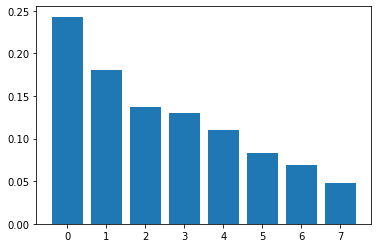

In [195]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(scaled_train_feature)
exp_variance = pca.explained_variance_ratio_
fig, ax = plt.subplots()
ax.bar(range(pca.n_components_), exp_variance)
plt.show()

No clear elbow in the plot present so, we cant use this approach to get intrinsic dimensions. 
Using __Using Cumulative explained variance plot__ to determine the number of features and then applying PCA to it. 
Hence reducing the dimensionality of our data.

[0.24297674 0.4234199  0.55992299 0.68986388 0.80042636 0.88344881
 0.95268664 1.        ]


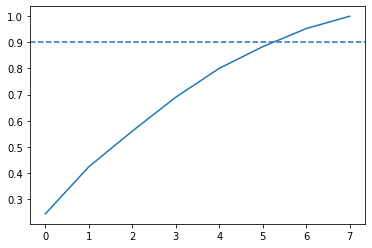

In [196]:
import numpy as np
cum_exp_var = np.cumsum(exp_variance)
print(cum_exp_var)
fig, ax = plt.subplots()
ax.plot(range(pca.n_components_), cum_exp_var)
ax.axhline(y=0.9, linestyle="--")
n_components = 6
pca = PCA(n_components, random_state=10)
pca.fit(scaled_train_feature)
pca_projection =  pca.transform(scaled_train_feature)

Training our model to differentiate between the genres using Decision Tree

In [197]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
train_features, test_features, train_labels, test_labels = train_test_split(pca_projection, genre, random_state=10)
tree = DecisionTreeClassifier(random_state=10)
tree.fit(train_features, train_labels)
pred_labels_tree = tree.predict(test_features)

Training our model to differentiate between the genres using Logistic Regression

In [198]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=10)
logreg.fit(train_features, train_labels)
pred_labels_logit = logreg.predict(test_features)
from sklearn.metrics import classification_report
class_rep_tree = classification_report(test_labels, pred_labels_tree)
class_rep_log = classification_report(test_labels, pred_labels_logit)
print("Decision Tree: \n", class_rep_tree)
print("Logistic Regression: \n", class_rep_log)

Decision Tree: 
               precision    recall  f1-score   support

     Hip-Hop       0.60      0.60      0.60       235
        Rock       0.90      0.90      0.90       966

    accuracy                           0.84      1201
   macro avg       0.75      0.75      0.75      1201
weighted avg       0.84      0.84      0.84      1201

Logistic Regression: 
               precision    recall  f1-score   support

     Hip-Hop       0.77      0.54      0.64       235
        Rock       0.90      0.96      0.93       966

    accuracy                           0.88      1201
   macro avg       0.83      0.75      0.78      1201
weighted avg       0.87      0.88      0.87      1201



#### Balancing our data
Balancing our data so that we get a better classification performance for both the genres instead of
just one of them
We got the differing accuracy results for both the genres because of the noticeable difference in their frequency
So in order to improve that we balance our data i.e we made both the genres to have the same number 
of occurences(frequency)

In [199]:
hop_only = echotracks.loc[echotracks["genre_top"] == "Hip-Hop"]
rock_only = echotracks.loc[echotracks["genre_top"] == "Rock"].sample(len(hop_only), random_state=10)
rock_hop_bal = pd.concat([rock_only, hop_only])
features = rock_hop_bal.drop(['genre_top', 'track_id'], axis=1) 
labels = rock_hop_bal['genre_top']
pca_projection = pca.fit_transform(scaler.fit_transform(features))
train_features, test_features, train_labels, test_labels = train_test_split(pca_projection, labels, random_state=10)

In [200]:
tree = DecisionTreeClassifier(random_state=10)
tree.fit(train_features, train_labels)
pred_labels_tree = tree.predict(test_features)
logreg = LogisticRegression(random_state=10)
logreg.fit(train_features, train_labels)
pred_labels_logit = logreg.predict(test_features)
print("Decision Tree: \n", classification_report(test_labels, pred_labels_tree))
print("Logistic Regression: \n", classification_report(test_labels, pred_labels_logit))

Decision Tree: 
               precision    recall  f1-score   support

     Hip-Hop       0.74      0.73      0.74       230
        Rock       0.73      0.74      0.73       225

    accuracy                           0.74       455
   macro avg       0.74      0.74      0.74       455
weighted avg       0.74      0.74      0.74       455

Logistic Regression: 
               precision    recall  f1-score   support

     Hip-Hop       0.84      0.80      0.82       230
        Rock       0.80      0.85      0.83       225

    accuracy                           0.82       455
   macro avg       0.82      0.82      0.82       455
weighted avg       0.82      0.82      0.82       455



Prediction of the Decision tree is 74% correct while of the Logistic Regression its 82% correct.